## Computer Vision

Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

In [6]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Shape of X_train:", train_images.shape)
print("Shape of X_test:", test_images.shape)
print("Shape of y_train:", train_labels.shape)
print("Shape of y_test:", test_labels.shape)


Shape of X_train: (60000, 28, 28)
Shape of X_test: (10000, 28, 28)
Shape of y_train: (60000,)
Shape of y_test: (10000,)


In [2]:
import numpy as np

X_train_flat = train_images.reshape((60000, 784))
X_test_flat = test_images.reshape((10000, 784))

X_train_flat = X_train_flat / 255.0
X_test_flat = X_test_flat / 255.0


Accuracy for k=1: 0.9691
Accuracy for k=3: 0.9705
Accuracy for k=5: 0.9688
Accuracy for k=7: 0.9694
Accuracy for k=9: 0.9659


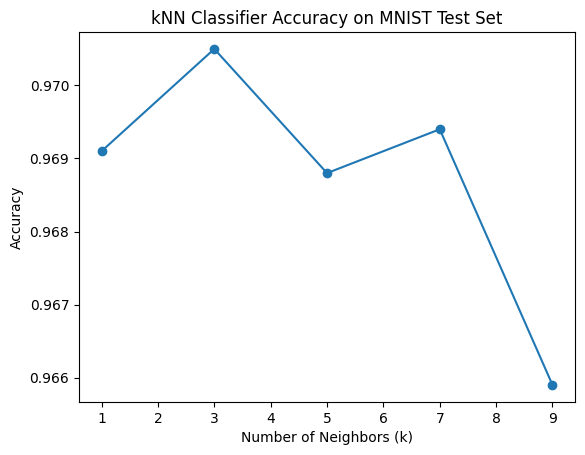

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_flat, train_labels)
    y_pred = knn.predict(X_test_flat)
    acc = accuracy_score(test_labels, y_pred)
    accuracies.append(acc)
    print(f"Accuracy for k={k}: {acc:.4f}")

plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("kNN Classifier Accuracy on MNIST Test Set")
plt.show()


Best k: 3
Test set accuracy: 0.9705


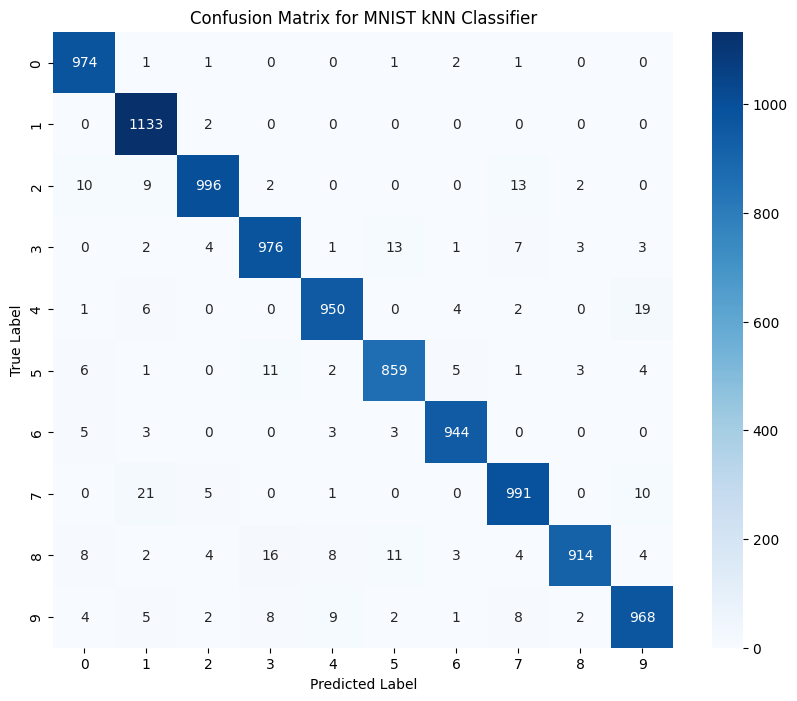

In [4]:
best_k = 3
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_flat, train_labels)
y_pred_best = knn_best.predict(X_test_flat)

accuracy = accuracy_score(test_labels, y_pred_best)
print(f"Best k: {best_k}")
print(f"Test set accuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(test_labels, y_pred_best)

import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for MNIST kNN Classifier")
plt.show()


Observing the confusion matrix:

The most common mistakes happen between similar digits, e.g., 4 misclassified as 9 or 3 as 8, because their structures resemble each other.
1 is usually predicted accurately since it has a distinct shape.


In [5]:
image = np.random.randint(0, 256, (32, 32, 3)) 
X_flat = image.reshape((1, 32 * 32 * 3)) 


The kNN classifier can recognize handwritten digits with high accuracy.
Image processing for ML involves flattening images into vectors.
Color images add another dimension due to RGB encoding.
This workflow shows how computers "see" by converting images into numerical data for pattern recognition.